## Capstone Project 1 - Milestone Report

This is the early draft of the final Capstone Project 1 report.

---

#### Objectives

Write a draft of your Capstone project 1 milestone report with the following included:

1. Define the problem
2. Identify your client
3. Describe your data set, and how you cleaned/wrangled it
4. List other potential data sets you could use
5. Explain your initial findings
6. Share the Capstone Project 1 code and milestone report related to Github repository

---

#### 1. Define the problem
Find the best method to predict wine quality score by regression using physicochemical attributes and preference rating. 

---

#### 2. Identify your client

Winemakers who want to replicate highly scored wines to produce more valuable products.

---

#### 3. Describe your data set, and how you cleaned/wrangled it

The dataset consists of nearly 4900 samples of white Portuguese vinho verde, which are wines from a particular region in Portugal. Each sample contains 11 physicochemical attributes and a preference score. The attributes are common analytical tests taken by winemakers throughout the winemaking process, from fresh juice before fermentation to aging wine in oak barrels. The preference score is measured from 0 to 10 by tasting test of wine experts. Each sample is evaluated by a group of three tasters and the median score is taken.

The description of attributes are:

1. Fixed acidity: the measurement of tartaric acid in the wine, which contributes to the main acidity in taste.
2. Volatile acidity: the measurement of acetic acid, which contributes undesirable scent of vinegar.
3. Citric acid: the measurement of citric acid, which is an additive in minute quantity to boost acidity in wine. It is also added in standardized quantity to remove excess iron and copper from wine.
4. Residual sugar: the amount of dissolved sugar present.
5. Chlorides: the amount of salt (sodium chloride) in the wine.
6. Free sulfur dioxide: the measurement of unbounded form of sulfur dioxide. Free sulfur dioxide have the property of inhibiting microbial growth (turning alcohol into vinegar) and the oxidation of wine, both of which have negative impact to quality.
7. Total sulfur dioxide: the measurement of both free and bounded sulfur dioxide.
8. Density: density measurement of the wine, which can affect the mouthfeel of tasting.
9. pH: measures the chemical acidity of the wine.
10. Sulphates: the measurement of potassium sulphates, which may be related to the presence of fertilizer and an indicator of fermentable nutrition in grapes
11. Alcohol: the percent of alcohol in the wine.

The dataset is maintained by the UCI Machine Learning Repository and was published by the authors of *Modeling wine preferences by data mining from physicochemical properties*. The wine samples were collected from the official certification entity of vinho verde. Since the dataset came from a published study, it has already been cleaned and wrangled for use. Due to its completeness, it has been widely used on kaggle.com for machine learning projects. The dataset does contain a few outliers that distort scatter plots for storytelling. The samples are removed in graphs for better visualization in graphs, but their values remained in the data frame when applying inferential statistics.

---

#### 4. List other potential data sets you could use

This dataset is so far the only available and widely used dataset on the web that contains both analytical and preference variables. There are very few other wine related datasets available over the internet to be utilized. Some of them contains only physiochemical analysis data (http://archive.ics.uci.edu/ml/datasets/Wine) or wine review data scrapped from Wine Enthusiast website (https://www.kaggle.com/zynicide/wine-reviews). The original source of the dataset in this project came from the CVRVV. The Comissão de Viticultura da Região dos Vinhos Verdes (CVRVV) also known as The Viticulture Commission of the Vinho Verde Region, is an organization that protects the interest and helps promote the wines of the Vinho Verde region. Likewise, similar data of wines from other regions may be obtained by comparable entities.

---

#### 5. Explain your initial findings

Initially, we find the majority of wine samples have quality score between 5 and 7, there are only a small fraction of samples that are either end of the spectrum. There are many outliers in various attributes by the definition of 1.5 interquartile range beyond the third quartile. However, there are only a handful of outlier values that distort the legibility of scatter plots between attributes. 

Overall, there is no apparent single variable that is determinate of the quality of the wine samples. The highest correlation between attributes and wine quality is alcohol content, which the correlation coefficient is 0.44. However, there are many attributes that are highly correlated due their physical and chemical properties. Examples are residual sugar increases the density of water while alcohol has less density than water, therefore residual sugar, alcohol, and density are highly correlated. Since total sulfur dioxide is the measurement of both free and bounded forms of sulfur dioxide, the attributes are also correlated.

---

#### 6. Share the Capstone Project 1 code and milestone report related to Github repository

In [9]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# load the white wine quality dataset.
filename = 'winequality-white.csv' 
df = pd.read_csv(filename, sep=';')

# print the information of the dataset.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
# generates counts of wine samples by each quality score, and a chart is generated by using Tableau.
count = df.quality.value_counts().sort_index()
count

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

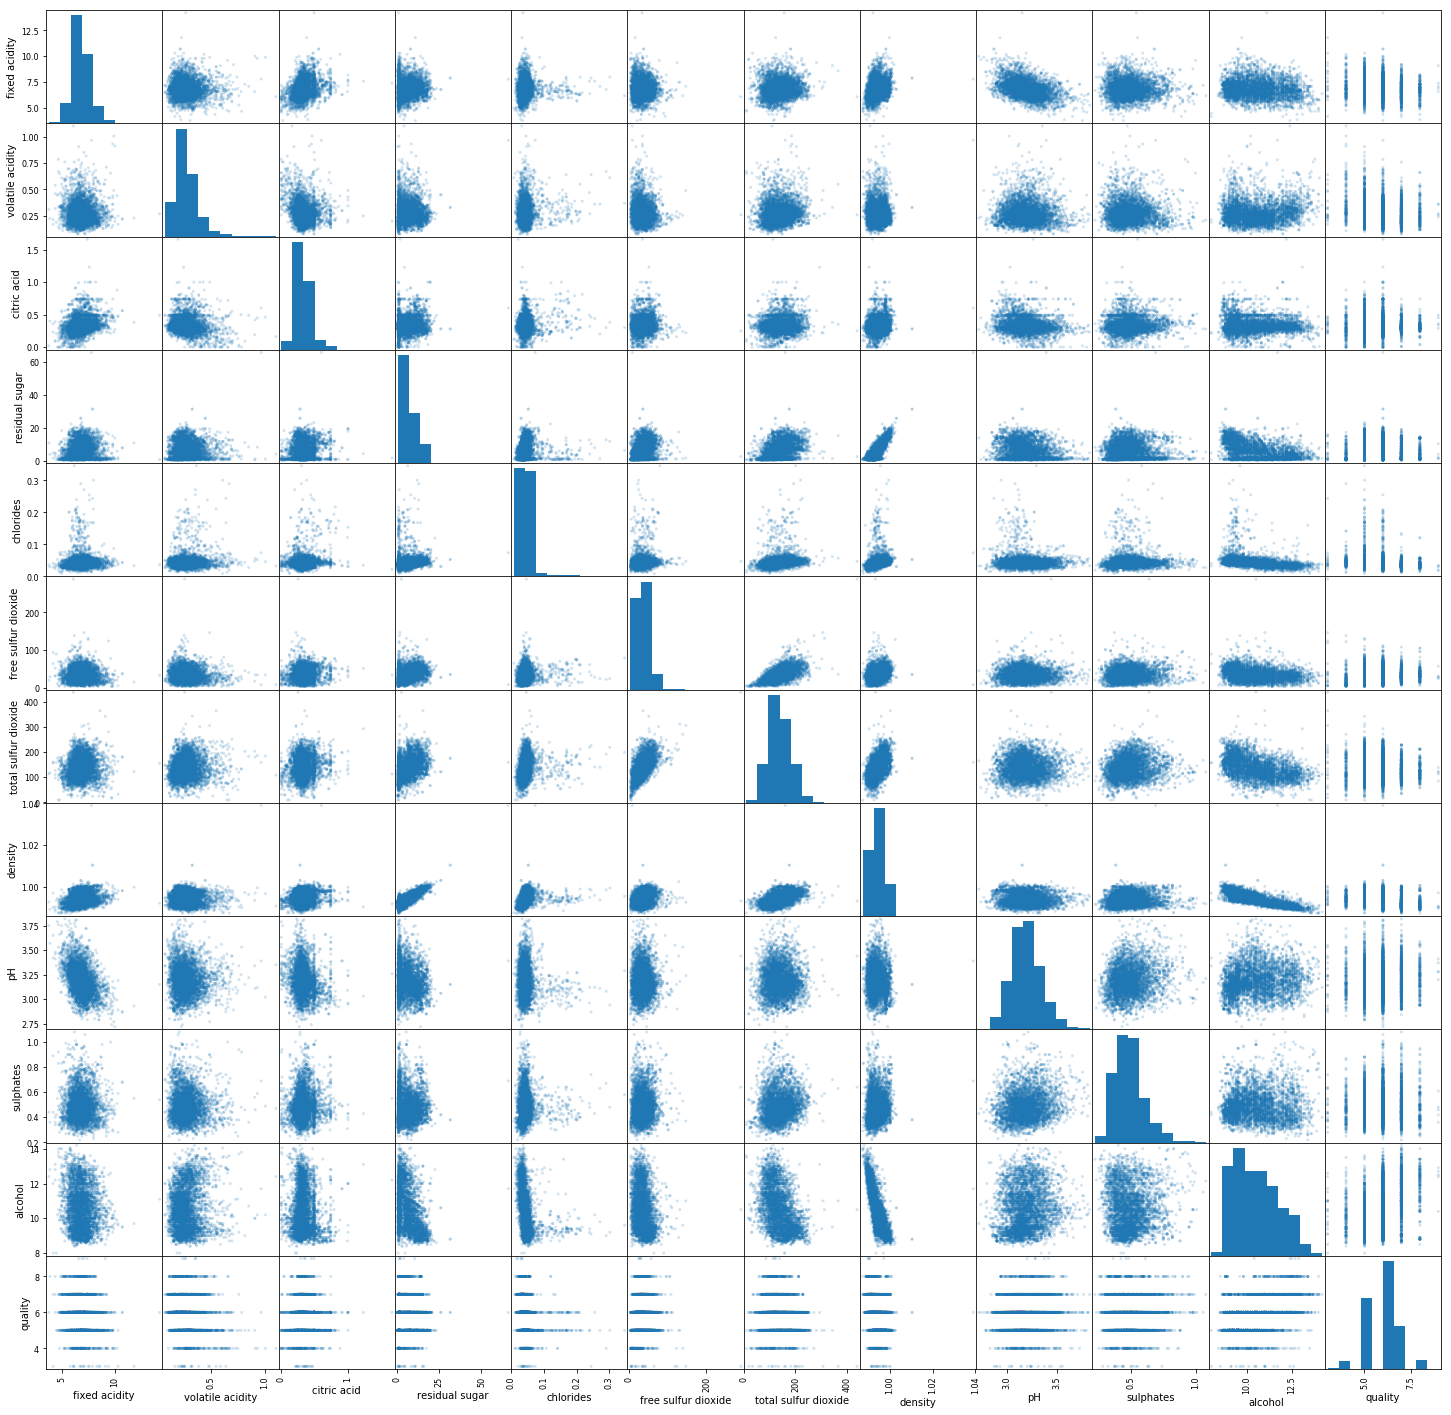

In [14]:
# create a scatter plot matrix to see the correlation between each attributes and quality score
smatrix = scatter_matrix(df, alpha=0.2, figsize=(25,25))

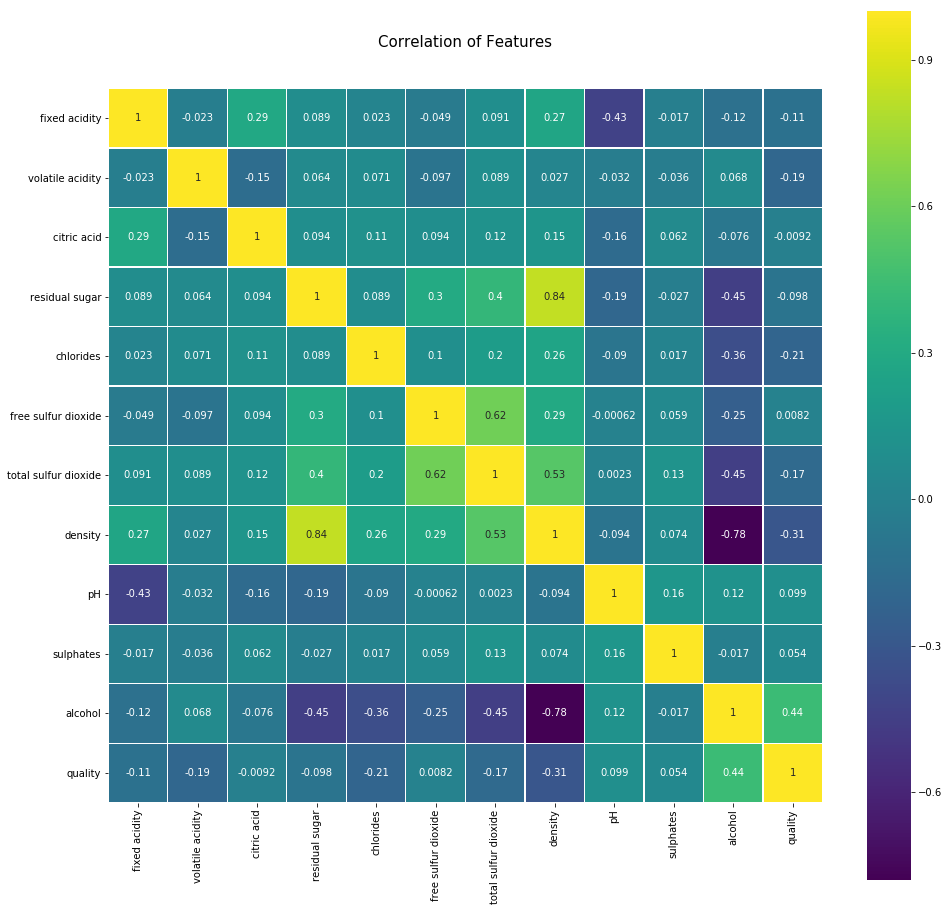

In [7]:
# create a correlation heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)